In [ ]:
""" 
    Two driven springs and a mass: a classical analogelectromagnetically-induced transparency
    Preston Huft, May 2019
    
    TODO: use FFT to extract frequency
"""

In [3]:
import numpy as np
from numpy import sin,cos
from matplotlib import pyplot as plt
from scipy.integrate import complex_ode,odeint
from scipy.integrate import solve_ivp
import sympy
from sympy.utilities.lambdify import lambdify, implemented_function
from sympy.utilities.iterables import flatten
import time
from math import pi,sqrt

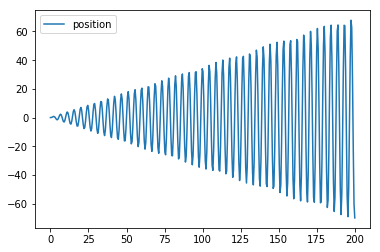

In [80]:
def derivs(u,t,k1,k2,O1,O2,y0,A,B):
    """ k1,k2 = spring consts
        O1,O2 = driving freqs
        y0 = equilibrium length; same for each spring 
    """
    k = k1+k2
    Y,y = u
    Ydot = -k*y + A*sin(O1*t) + B*sin(O2*t-pi)
    ydot = Y
    return [Ydot,ydot]
    
k1 = k2 = 1 # System resonance at sqrt((k1+k2)/M),M=1
O1 = sqrt(k1+k2)
O2 = 0
A1 = 1 # pump 
A2 = 1.1 # probe

func = lambda t,u: derivs(u,t,k1,k2,O1,O2,y0,A1,A2)

t_exp = 200 #3*1/min(O1,O2)
tpts = 400
u0 = [0,0] # vel,pos

soln = solve_ivp(func,[0,t_exp],u0,t_eval=np.linspace(0,t_exp,tpts))

fig = plt.figure()
ax = fig.add_subplot(111)
# ax.plot(soln.t,soln.y[0],label="velocity")
ax.plot(soln.t,soln.y[1],label="position")
# ax.set_ylim((-1,1))
ax.legend(loc='best')
plt.show()

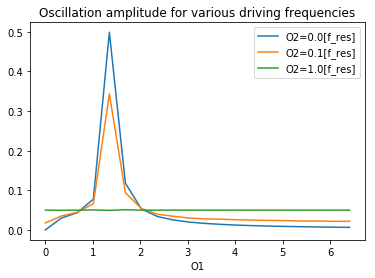

In [107]:
# For the second spring undriven, we see that the system oscillates
# maximally at the expected resonance frequency, by scanning over 
# one spring's driving frequency. On the contrary, if the second spring
# is driven at a frequency much less the resonance frequency, then 
# the resonance frequency goes down. This is how a far-off-resonance
# trap holds a cold atom-- by lowering it's ground state resonance.

k1 = k2 = 1 # System resonance at sqrt((k1+k2)/M),M=1
O_res = sqrt(k1+k2)
O2_list = [x*O_res for x in [0, .1, 1]] # O2 = 0
A1 = 1 # pump 
A2 = 1 # probe
res = sqrt(k1+k2)

t_exp = 200 #3*1/min(O1,O2)
tpts = 400
u0 = [0,0] # vel,pos

O1_list = np.linspace(0,res+5,20)
vals = np.empty(len(O1_list))

fig = plt.figure()
ax = fig.add_subplot(111)

for i,O2 in enumerate(O2_list):
    for i,O1 in enumerate(O1_list):
        func = lambda t,u: derivs(u,t,k1,k2,O1,O2,y0,A1,A2)
        soln = solve_ivp(func,[0,t_exp],u0,
                         t_eval=np.linspace(0,t_exp,tpts))
        vals[i]=(max(soln.y[1]))

    norm = sum(vals)
    vals = [x/norm for x in vals]
    ax.plot(O_list,vals,label=f"O2={O2/O_res}[f_res]")
    
norm = sum(vals)
vals = [x/norm for x in vals]

ax.set_title("Oscillation amplitude for various driving frequencies")
ax.set_xlabel("O1")
ax.legend(loc='best')
plt.show()

In [96]:
res

1.4142135623730951